In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [2]:
data = pd.read_csv("dataset/train.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
X = data.drop(columns= 'price_range')
Y = data.iloc[:,-1]

In [5]:
#apply selectKbest pick top 10 features
best_features = SelectKBest(score_func= chi2,k =10)

In [6]:
fit = best_features.fit(X,Y)

In [7]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [8]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [9]:
featurescores = pd.concat([dfcolumns, dfscores], axis = 1)

In [10]:
featurescores.columns  = ['Features', 'Score']

In [25]:
imp_feat = featurescores.sort_values(by = 'Score', ascending= False).head(10)['Features'].values

# Feature Importance

In [12]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [13]:
model  = RandomForestClassifier()
model.fit(X,Y)

RandomForestClassifier()

In [14]:
model.feature_importances_

array([0.07355858, 0.0061661 , 0.0276496 , 0.00665665, 0.0244634 ,
       0.00620316, 0.03654892, 0.02416446, 0.03919669, 0.02163684,
       0.02945474, 0.05619443, 0.05751428, 0.48571327, 0.02718732,
       0.02830996, 0.03045534, 0.00548394, 0.00704467, 0.00639763])

In [15]:
featureImportance = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['Importance'])

In [16]:
featureImportance = featureImportance.sort_values(by = 'Importance', ascending=False)

In [17]:
plt.figure(figsize = (30,20) ,dpi = 720)
plt.bar(featureImportance.index, featureImportance['Importance'])
plt.show()

## Correlation Method

In [18]:
datacorr = data.corr()

<Axes: >

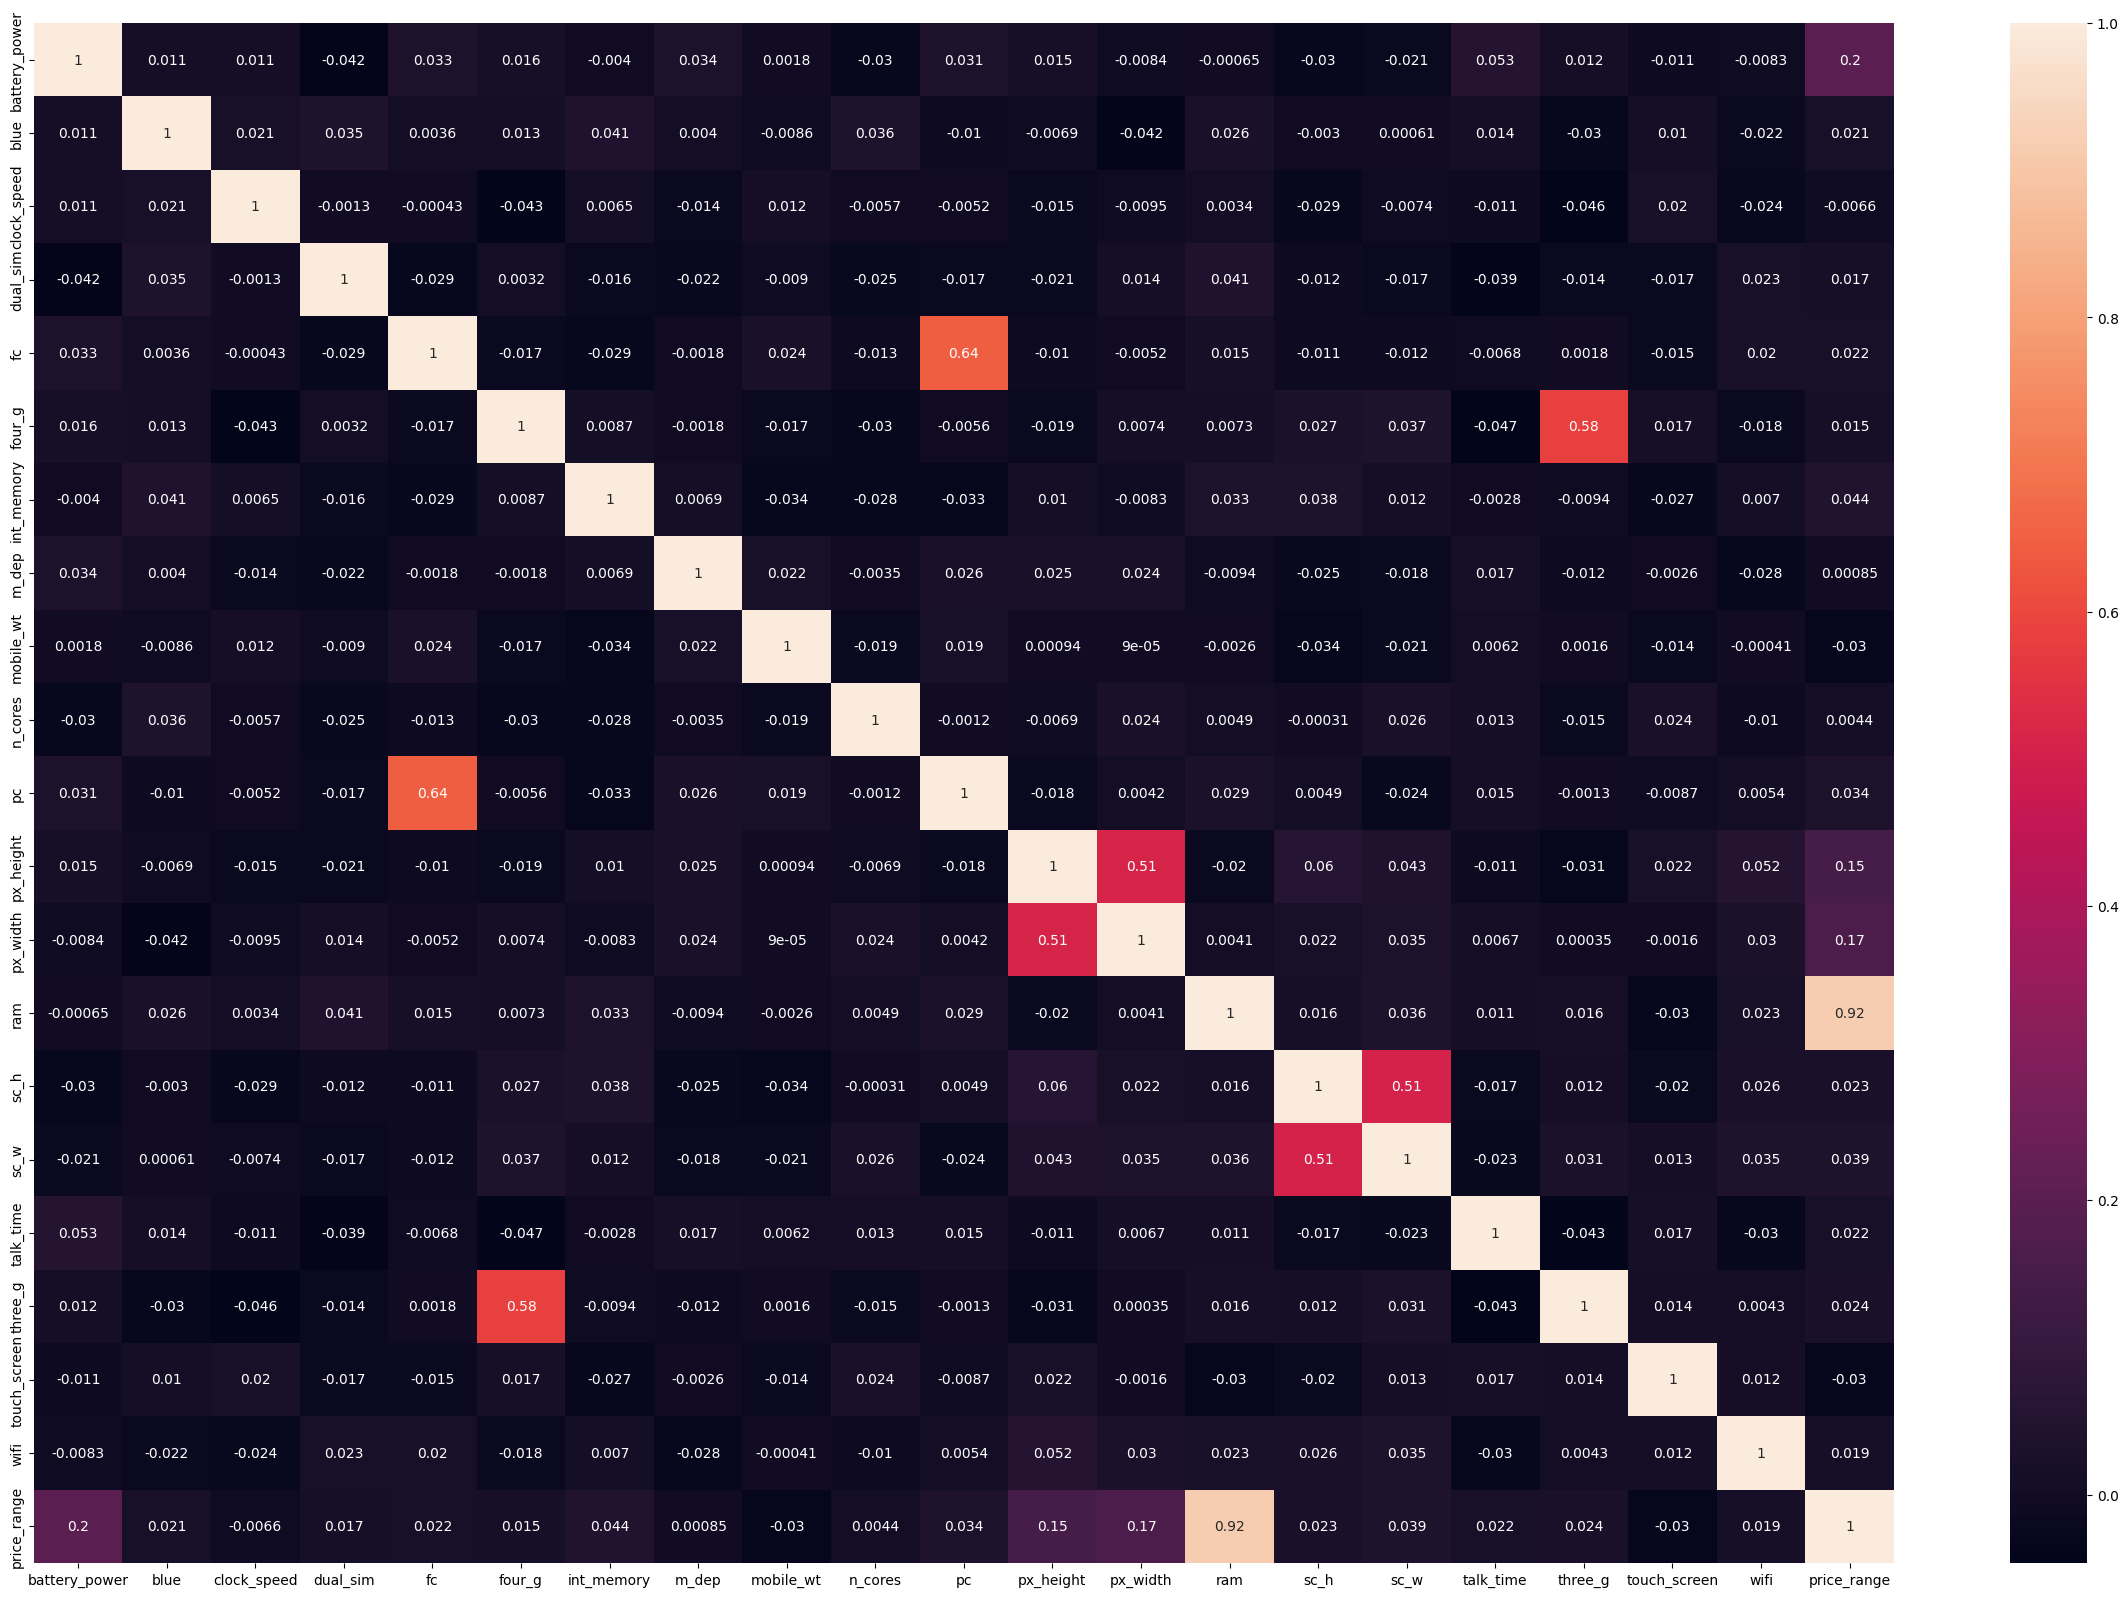

In [19]:
import seaborn as sns
plt.figure(figsize= (30,20))
sns.heatmap(datacorr,annot=True)

## Check the model Performance


In [20]:
from sklearn.model_selection import cross_val_score

In [23]:
scores = cross_val_score(model, X,Y , cv = 10)

In [24]:
scores.mean()

0.8905

In [27]:
X[imp_feat]

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [28]:
scores_new = cross_val_score(model, X[imp_feat], Y , cv = 10)

In [30]:
scores_new.mean()

0.9015000000000001